# Agropecuária em Valores

## Carregando bibliotecas

In [39]:
# dados
import ipeadatapy as ipea
import sgs

# manipulacao de dados
import pandas as pd
import geopandas as gpd

# graphs
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

py.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
pib_agro2 = ipea.timeseries(
    'SCN10_VAAGRON10'
)

In [7]:
pib_agro2 = pib_agro2[pib_agro2.YEAR >= 1990]

In [8]:
pib_agro2['VALUE (R$)'].iplot(kind='bar',color='green', title= 'PIB agropecuária anual')

- Esta mesma série foi deflacionada pelo IPCA ( IPEADATA também trás disponível a série deflacionada)

In [20]:
agro_deflat=pd.read_csv(
    'https://github.com/odxone/imil_agro_anexo/raw/main/nbs/data_agro_valores/pib_agro_valores.csv',
    sep=';',
)[['DATA', 'Nominal', 'Real']]

In [22]:
agro_deflat=agro_deflat.set_index(['DATA'])

In [23]:
agro_deflat.iplot(title='PIB-Valor Adicionado Agropecuária- correção pelo IPCA de Março de 2021')

- Já os mapas foram retirados do shape file fornecido pelo IBGE no Censo Agropecuário neste endereço: 

https://mapasinterativos.ibge.gov.br/agrocompara/

In [25]:
shape=gpd.read_file('https://github.com/odxone/imil_agro_anexo/raw/main/nbs/data_gini/mun_agro.zip')
shape.head(2)

,OBJECTID,MUNICIPIO,Shape_Leng,Shape_Area,V1,V2,V3,V4,V5,V6,...,GEO,V32,V33,V34,V35,V36,V37,V38,V39,geometry
0,1,Lupionópolis - PR,0.514701,0.010596,173.0,59.7001,3.23121,165.7380,852.3680,124.304,...,4113809.0,2.45788,1.15607,48.5549,8.58624,8.09249,68.7861,71.0983,36.9942,"POLYGON Z ((-51.63021 -22.66372 0.00000, -51.6..."
1,2,Águas de Lindóia - SP,0.344094,0.004856,69.0,28.4016,3.42029,36.3902,80.0584,133.431,...,3500501.0,2.18536,5.79710,39.1304,2.43528,13.04350,49.2754,60.8696,46.3768,"POLYGON Z ((-46.61019 -22.43936 0.00000, -46.6..."


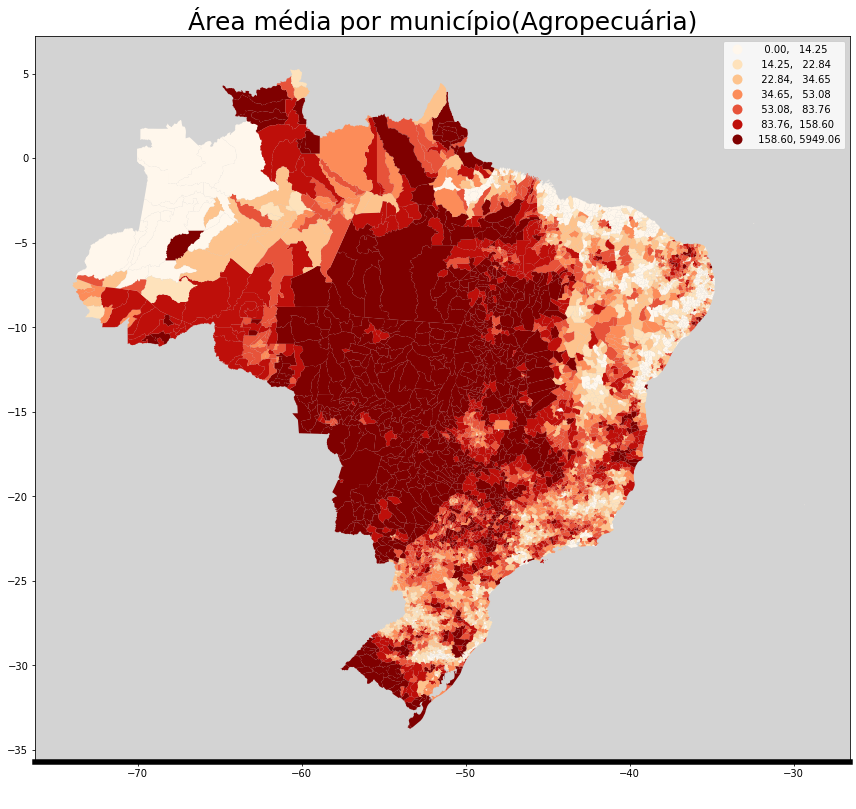

In [31]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
shape.plot(
    column='V2',
    scheme='Quantiles',
    k=7,
    cmap='OrRd',
    legend=True,
    ax=ax
)
ax.set_title("Área média por município(Agropecuária)", fontdict={'fontsize':25})
ax.set_xlabel(' ', fontdict={'fontsize':20})
ax.set_facecolor('lightgrey')
ax.spines['bottom'].set_linewidth(5.5)
fig.tight_layout()

In [37]:
regioes = pd.read_csv(
    "https://github.com/odxone/imil_agro_anexo/raw/main/nbs/data_agro_valores/regioes_agro.csv",
    sep = ";",
    encoding='latin-1'
)
mapa = pd.merge(shape,regioes,on=['OBJECTID'],how='left')

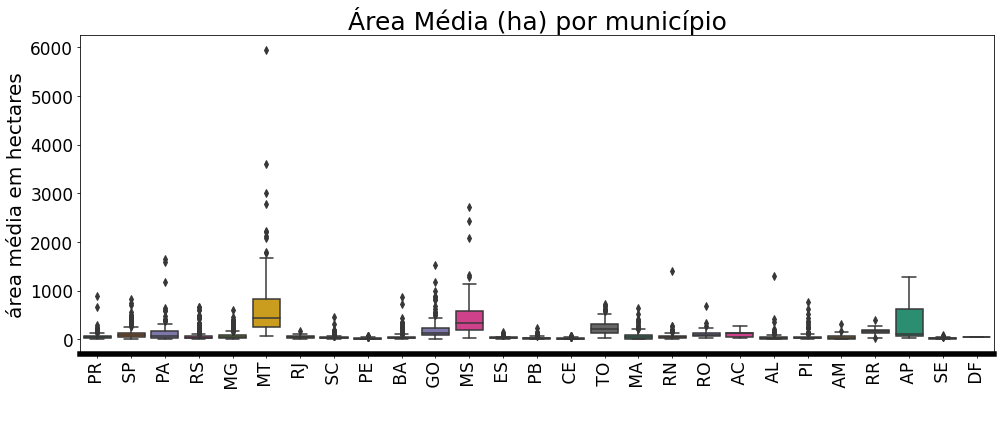

In [40]:
gráfico = mapa
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style('darkgrid')
sns.boxplot(x=gráfico['Estado'],
            y=gráfico['V2'],
            ax=ax,
            data=gráfico,
            palette="Dark2")
ax.set_title("Área Média (ha) por município", fontdict={'fontsize':25})
ax.spines['bottom'].set_linewidth(5.5)
ax.tick_params(labelsize=20)
plt.xticks(rotation=90, size=17)
plt.yticks(rotation=0, size=17)
ax.set_ylabel('área média em hectares', fontdict={'fontsize':20})
ax.set_xlabel(' ', fontdict={'fontsize':20})
fig.tight_layout()

In [41]:
area_por_estado = mapa.groupby(['Estado', 'Região']).sum()[['V2']].reset_index()
area_por_estado = area_por_estado.sort_values(ascending=False, by='V2')

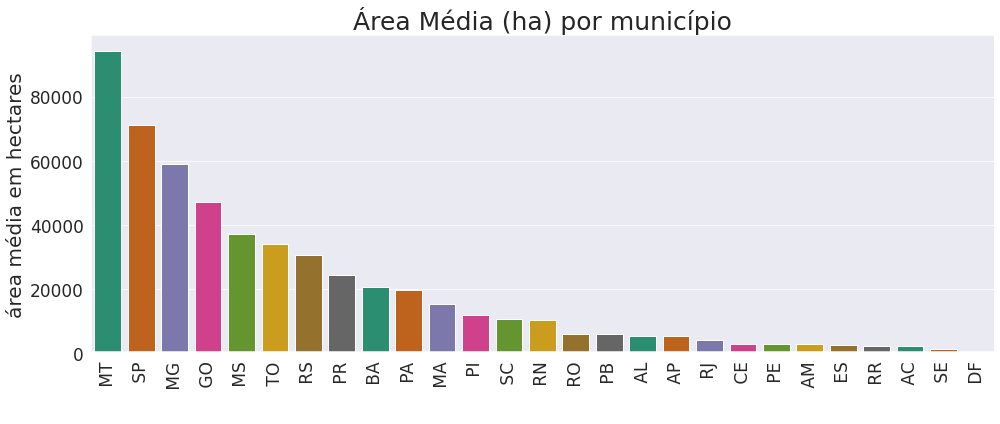

In [42]:
gráfico = area_por_estado
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style('darkgrid')
sns.barplot(x=gráfico['Estado'],
            y=gráfico['V2'],
            ax=ax,
            data=gráfico,
            palette="Dark2")
ax.set_title("Área Média (ha) por município", fontdict={'fontsize':25})
ax.spines['bottom'].set_linewidth(5.5)
ax.tick_params(labelsize=20)
plt.xticks(rotation=90, size=17)
plt.yticks(rotation=0, size=17)
ax.set_ylabel('área média em hectares', fontdict={'fontsize':20})
ax.set_xlabel(' ', fontdict={'fontsize':20})
fig.tight_layout()

- Já a série trimestral foi obtida do SGS do Banco Central, através da API 

In [34]:
series_VA = [22105,22106,22107,22110]
labels_VA = ['PIB_Agropecuária','PIB_Indústria','PIB_serviços','Consumo_das_famílias']
data_inicial ='01-01-1996'
data_final = '01-01-2021'
Valor_adicionado_por_setor = sgs.dataframe(series_VA, start= data_inicial, end=data_final)
Valor_adicionado_por_setor = Valor_adicionado_por_setor.rename(columns={s:l for s, l in zip(series_VA, labels_VA)})

In [35]:
Valor_adicionado_por_setor.head()

,PIB_Agropecuária,PIB_Indústria,PIB_serviços,Consumo_das_famílias
1996-01-01,95.12,100.69,100.80,98.86
1996-04-01,96.59,97.05,102.31,100.93
1996-07-01,101.69,105.99,103.69,103.70
1996-10-01,126.16,99.54,101.56,109.13
1997-01-01,101.74,104.25,103.86,106.65


In [36]:
Valor_adicionado_por_setor.iplot(title= 'PIB Trimestral por Setor- Dados dessazonalizados')